In [1]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

PermissionError: [WinError 5] 액세스가 거부되었습니다

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers


import numpy as np
import matplotlib.pyplot as plt

In [3]:
#dataset loader setup

train_generator = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    validation_split = 0.2
)

test_generator = ImageDataGenerator(
    rescale=1/255.
)

In [6]:
train_flow = train_generator.flow_from_directory(
    directory='weather_dataset/train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,
    subset='training'
)

val_flow = train_generator.flow_from_directory(
    directory='weather_dataset/train/',
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64,
    subset='validation'
)

test_flow = test_generator.flow_from_directory(
    directory='weather_dataset/test/',
    shuffle = False,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


In [7]:
class_names = { 
    0: "흐림", 
    1: "비",
    2: "맑음",
    3: "일출" 
}

In [8]:
images,targets = next(train_flow)



일출


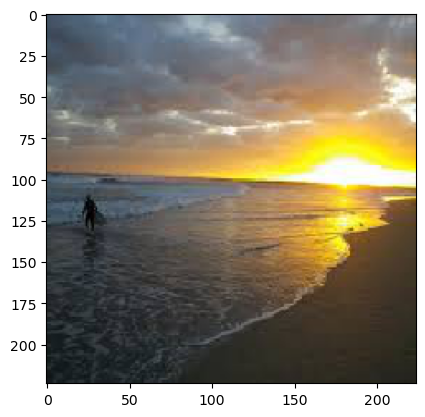

맑음


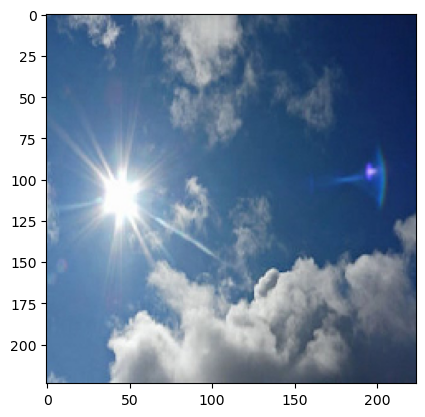

맑음


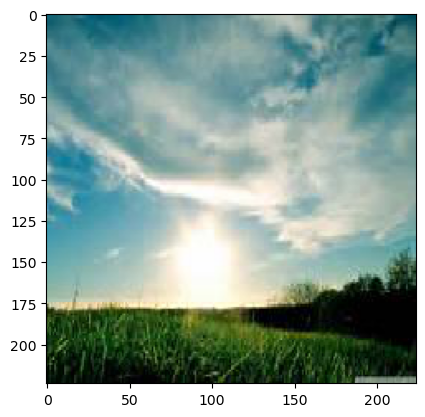

일출


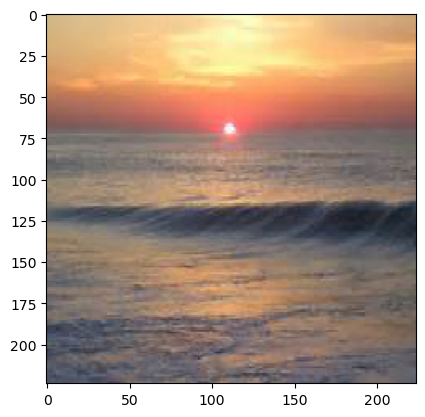

맑음


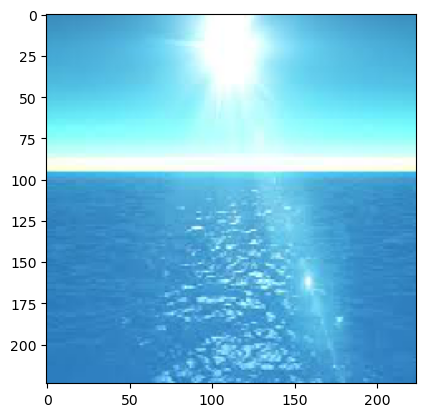

In [9]:
for i in range(5):
    print(class_names[np.argmax(targets[i])])
    plt.imshow( images[i] )
    plt.show()

In [12]:
images[0].shape

(224, 224, 3)

In [25]:
## simpel model 
model  = Sequential()

model.add( layers.InputLayer(shape=(224, 224, 3))) 
model.add( layers.Flatten() )
model.add( layers.Dense(4, activation='softmax')) 



In [26]:
## deeper model

model2 = Sequential()

model2.add( layers.InputLayer(shape=(224, 224, 3)))
model2.add( layers.Flatten() ) 
model2.add( layers.Dense(64, activation='relu'))
model2.add( layers.Dense(4, activation='softmax'))



In [27]:
## more deeper model

model3 = Sequential()

model3.add(layers.InputLayer(shape=(244, 244, 3)))
model2.add( layers.Flatten() ) 
model2.add( layers.Dense(128, activation='relu'))
model2.add( layers.Dense(64, activation='relu'))
model2.add( layers.Dense(32, activation='relu'))
model2.add( layers.Dense(4, activation='softmax'))




In [28]:
model.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history = model.fit(train_flow, epochs=30, validation_data=val_flow)

Epoch 1/30


c:\Users\msong\anaconda3\envs\py3_11_8\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.3012 - loss: 56.4785 - val_accuracy: 0.4464 - val_loss: 59.3732
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.4320 - loss: 55.7299 - val_accuracy: 0.4821 - val_loss: 48.1042
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step - accuracy: 0.5388 - loss: 37.8524 - val_accuracy: 0.5833 - val_loss: 20.4217
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.5973 - loss: 26.3840 - val_accuracy: 0.4821 - val_loss: 53.6911
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.5520 - loss: 35.3564 - val_accuracy: 0.4762 - val_loss: 27.0278
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.5710 - loss: 23.8273 - val_accuracy: 0.5714 - val_loss: 72.7641
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.6421 - loss: 27.5576 - val_accuracy: 0.6429 - val_loss: 15.7723
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.6142 - loss: 23.8504 - val_accuracy

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model2.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history2 = model2.fit(train_flow, epochs=30, validation_data=val_flow)

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

In [ ]:
model3.compile( optimizer= 'sgd', loss = 'crossentropy', metrics=['accuracy'] )
history3 = model3.fit(train_flow, epochs=30, validation_data=val_flow)

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])